In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import os
import csv
rcParams['figure.figsize'] = 9, 6

In [43]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append(name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['df_'+name] = df
    except KeyError:
        print('help!')
        continue


In [95]:
X = np.asarray(df__C1_2_1['XCOORD.'])
Y = np.asarray(df__C1_2_1['YCOORD.'])
XY = np.array((X,Y)).T


c:\Users\medco\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


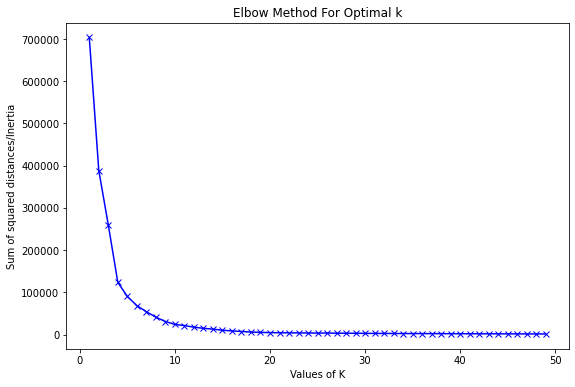

In [129]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(XY)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

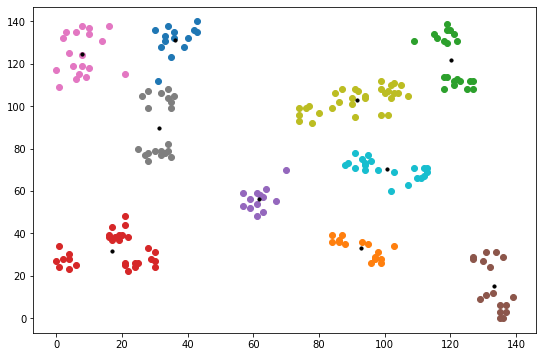

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

In [112]:
# for i in datanames:
#     X=vars()['df_'+i]['XCOORD.']
#     Y=vars()['df_'+i]['YCOORD.']
#     plt.gca()
#     plt.title('df'+i)
#     plt.scatter(X,Y, s=20, c=Y, cmap=plt.cm.get_cmap('coolwarm', 9))
#     plt.show()